<style>
//change background settings {}
div.slide-background {
border-top: 30px crimson solid;
border-bottom: 30px crimson solid;
}|
</style>

<style>
//change background settings {}
div.slide-background {
	border-top: 30px crimson solid;
	border-bottom: 30px crimson solid;
}
</style>

In [12]:
%matplotlib inline
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

<style>
//change background settings {}
div.slide-background {
	border-top: 30px crimson solid;
	border-bottom: 30px crimson solid;
}
</style>

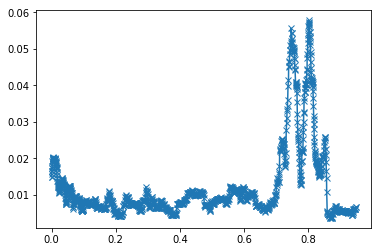

In [14]:
#def my_plotter(ax, data1, data2, param_dict):
#    out = ax.plot(data1, data2, **param_dict)
#    return out

def my_plotter(ax, data1, data2, param_dict):
    ax.plot(data1, data2, **param_dict)



fileName= "pipelinerouteBRUP.TXT"
viewingWindow = 50
kpArray = []
eastingArray= []
northingArray = []
depthArray = []
segmentStdDevs = []

pipeCounter = 0
limitReached = False
listing = open(fileName, 'r')
for line in listing:
    kp, easting, northing, depth = line.split(',')
    kpArray.append(float(kp))
    eastingArray.append(float(easting))
    northingArray.append(float(northing))
    depthArray.append(float(depth))

# Start rolling window processing
for pipeCounter in range(0, len(kpArray) - 1):
    if limitReached:
        continue
    
    segmentDistance = 0
    kpViewingArray = []
    eastingViewingArray = []
    northingViewingArray = []
    depthViewingArray = []
    windowCounter = 0
    
    while segmentDistance < viewingWindow :
        # Check if we have reached the furthest extents of the route where we can
        # calculate a standard deviation of the full viewing window length
        # if we have, then we need to stop here
        if pipeCounter + windowCounter >= len(kpArray) -1:
            limitReached = True
        
        kpViewingArray.append(kpArray[pipeCounter + windowCounter])
        eastingViewingArray.append(eastingArray[pipeCounter + windowCounter])
        northingViewingArray.append(northingArray[pipeCounter + windowCounter])
        depthViewingArray.append(depthArray[pipeCounter + windowCounter])

        if windowCounter > 1:
            segmentDistance = segmentDistance + distance.euclidean([eastingArray[pipeCounter + windowCounter], northingArray[pipeCounter + windowCounter], depthArray[pipeCounter + windowCounter]],
                                                                    [eastingArray[pipeCounter + windowCounter - 1], northingArray[pipeCounter + windowCounter - 1], depthArray[pipeCounter + windowCounter - 1]])
        
        windowCounter = windowCounter + 1
            
        
    eastingFit  = np.polyfit(np.array(kpViewingArray), np.array(eastingViewingArray), 2)
    northingFit  = np.polyfit(np.array(kpViewingArray), np.array(northingViewingArray), 2)
    depthFit = np.polyfit(np.array(kpViewingArray), np.array(depthViewingArray), 2)
    polyEastFunction = np.poly1d(eastingFit)
    polyNorthFunction = np.poly1d(northingFit)
    polyDepthFunction = np.poly1d(depthFit)
    
    viewingWindowSize = windowCounter
    windowCounter = 0
    segmentDistances = []
    
    for x in range(0, viewingWindowSize):
        smoothEasting = polyEastFunction(kpViewingArray[x])
        smoothNorthing = polyNorthFunction(kpViewingArray[x])
        smoothDepth = polyDepthFunction(kpViewingArray[x])
        #print(str(smoothEasting), str(smoothNorthing))
        segmentDistance = distance.euclidean([smoothEasting, smoothNorthing, smoothDepth], [eastingViewingArray[x], northingViewingArray[x], depthViewingArray[x]])
        segmentDistances.append(segmentDistance)

    segmentStdDev = np.std(np.array(segmentDistances))
    segmentStdDevs.append(segmentStdDev)
    
fig, ax = plt.subplots(1, 1)
my_plotter(ax, np.array(kpArray[0:len(segmentStdDevs)]), np.array(segmentStdDevs), {'marker': 'x'})
plt.show(block=True)


<function print>